In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Arial')
from math import nan
import pandas as pd

from qtrendutils import linfit_utils as linfit
from qtrendutils import calendar_utils as cal
from qtrendutils import mapplot_utils as mymaps
from qtrendutils import colorbar_utils as cbars

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

### Trend regression

In [3]:
cmip6_vp4trend = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_CMIP6_USSW.nc")
cmip6_pr4trend = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/precip/pr_CMIP6_USSW.nc")*86400.

cmip6info = pd.read_csv("/home/islas/python/qtrend_paper/DATA_SORT/CMIP6/cmip6csvinfo.csv")
models = cmip6info['Model']
nmems = cmip6info['Nmem']
nmemmax = np.max(cmip6info['Nmem'])
nmemscmip6 = nmems

cmip6_vp4trend_am = cal.calcannualmean(cmip6_vp4trend)
cmip6_pr4trend_am = cal.calcannualmean(cmip6_pr4trend)

cmip6_vp_trend = xr.apply_ufunc(linfit.compute_slope, cmip6_vp4trend_am, vectorize=True, input_core_dims=[['year']])*cmip6_vp4trend_am.year.size
cmip6_pr_trend = xr.apply_ufunc(linfit.compute_slope, cmip6_pr4trend_am, vectorize=True, input_core_dims=[['year']])*cmip6_pr4trend_am.year.size

for imodel in np.arange(0,cmip6_vp_trend.model.size,1):
    datx = cmip6_pr_trend.isel(model=imodel)
    daty = cmip6_vp_trend.vp.isel(model=imodel)
    datx = datx.sel(member=slice(1,nmems[imodel]))
    daty = daty.sel(member=slice(1,nmems[imodel]))
    
    if (imodel == 0):
        allx = datx.values
        ally = daty.values
    else:
        allx = np.append(allx, datx.values)
        ally = np.append(ally, daty.values)
        
a, btrend = linfit.linfit_xy(allx, ally)

In [4]:
era5 = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_ERA5_USSW.nc").vp
gpcc = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/precip/GPCC_USSW.nc").pr

cmip6_vp = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_CMIP6_USSW.nc")
cmip6_pr = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/precip/pr_CMIP6_USSW.nc")*86400.

cmip6info = pd.read_csv("/home/islas/python/qtrend_paper/DATA_SORT/CMIP6/cmip6csvinfo.csv")
models = cmip6info['Model']
nmems = cmip6info['Nmem']
nmemmax = np.max(cmip6info['Nmem'])
nmemscmip6 = nmems

lens2_vp = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_LENS2_USSW.nc")
lens2_pr = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/precip/pr_LENS2_USSW.nc")

In [5]:
era5_am = cal.calcannualmean(era5)
gpcc_am = cal.calcannualmean(gpcc)

cmip6_vp_am = cal.calcannualmean(cmip6_vp)
cmip6_pr_am = cal.calcannualmean(cmip6_pr)

lens2_vp_am = cal.calcannualmean(lens2_vp)
lens2_pr_am = cal.calcannualmean(lens2_pr)

In [6]:
nyears = era5_am.year.size

In [7]:
era5_anoms = linfit.lineardetrend(era5_am, "year")
gpcc_anoms = linfit.lineardetrend(gpcc_am, "year")

In [8]:
def setup_vp_vs_pr(x1, x2, y1, y2, titlestr, yticks=True):
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_ylim(-1,2.2)
    ax.set_xlim(-0.6,0.6)
    
    ax.plot([0,0],[-1,2.2], color='black')
    ax.plot([-0.6,0.6],[0,0], color='black')
    
    ax.set_yticks([-1,-0.5,0,0.5,1,1.5,2])
    ax.set_xticks([-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6])

    if (yticks):  
        ax.set_yticklabels(['-1.0','-0.5','0','0.5','1.0','1.5','2.0'], fontsize=13)
        ax.set_ylabel('Vapor pressure anomalies (hPa)', fontsize=13)
    else:
        ax.set_yticklabels([' ',' ',' ',' ',' ',' ',' '], fontsize=12)
        
    ax.set_xticklabels(['-0.6','-0.5','-0.4','-0.3','-0.2','-0.1','0','0.1','0.2','0.3','0.4','0.5','0.6'], fontsize=13)
    
    ax.set_xlabel('Precipitation anomalies (mm/day)', fontsize=13)
    ax.set_title(titlestr, fontsize=16)
    
    return ax

In [9]:
cmip6colors=['rosybrown','lightcoral','indianred','firebrick','maroon','red','chocolate','saddlebrown','sandybrown','peachpuff','tan',
             'darkgoldenrod','gold','darkkhaki',
             'olive','yellowgreen','darkolivegreen','darkseagreen','palegreen','forestgreen','mediumseagreen','mediumaquamarine',
             'turquoise','lightseagreen','teal','cadetblue','powderblue','steelblue','dodgerblue','blue','slateblue','darkslateblue',
             'blueviolet','indigo','mediumorchid','plum','violet','purple','palevioletred','magenta','crimson','lightpink']

### Map data

In [10]:
landfrac = xr.open_dataset("../../DATA_SORT/LANDFRAC_LENS2.nc")
landfrac = landfrac.landfrac
landfrac = landfrac.where(landfrac > 0, nan)
landfrac = landfrac.where(landfrac.lat > -60, nan) # omitting Antarctica

basepath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/OBS/"
era5 = xr.open_dataset(basepath+'/vaporpressures/vaporpressures_ERA5.nc').vp.sel(time=slice("1980-01-01","2020-12-31"))
era5['lon'] = landfrac.lon ; era5['lat'] = landfrac.lat
gpcc = xr.open_dataset(basepath+'/precip/GPCC.nc').pr.sel(time=slice("1980-01-01","2020-12-31"))
gpcc['lon'] = landfrac.lon ; gpcc['lat'] = landfrac.lat

gpcc_am = cal.calcannualmean(gpcc)
era5_am = cal.calcannualmean(era5)

gpcc_am = gpcc_am.where( ~np.isnan(gpcc_am), 0)
era5_am = era5_am.where( ~np.isnan(era5_am), 0)

gpcc_anoms_map = linfit.lineardetrend(gpcc_am, 'year')
era5_anoms_map = linfit.lineardetrend(era5_am, 'year')

In [11]:
acoef = xr.DataArray(np.zeros([gpcc_anoms_map.lat.size, gpcc_anoms_map.lon.size]), dims=['lat','lon'], coords=[gpcc_anoms_map.lat, gpcc_anoms_map.lon], name='a')
bcoef = xr.DataArray(np.zeros([gpcc_anoms_map.lat.size, gpcc_anoms_map.lon.size]), dims=['lat','lon'], coords=[gpcc_anoms_map.lat, gpcc_anoms_map.lon], name='b')

for ilon in np.arange(0,gpcc_anoms_map.lon.size,1):
    for ilat in np.arange(0,gpcc_anoms_map.lat.size,1):
        if (np.max(gpcc_anoms_map.isel(lon=ilon, lat=ilat)) > 0):
            a, b = linfit.linfit_xy(np.array(gpcc_anoms_map.isel(lon=ilon, lat=ilat)), np.array(era5_anoms_map.isel(lon=ilon, lat=ilat)))
            acoef[ilat,ilon] = a
            bcoef[ilat,ilon] = b

In [12]:
trendpath="/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/"

cmip6vp_map = xr.open_dataset(trendpath+'vptrends_CMIP6.nc')
cmip6vp_map['lon'] = landfrac.lon ; cmip6vp_map['lat'] = landfrac.lat
cmip6pr_map = xr.open_dataset(trendpath+'prtrends_CMIP6.nc')*86400.
cmip6pr_map['lon'] = landfrac.lon ; cmip6pr_map['lat'] = landfrac.lat

#create a 1D member/model axis
cmip6vp_map = cmip6vp_map.stack(z=['model','member'])
cmip6pr_map = cmip6pr_map.stack(z=['model','member'])

testpoint = cmip6vp_map.vp.sel(lon=180, lat=0, method='nearest')
cmip6vp_map = cmip6vp_map.where(~np.isnan(testpoint), drop=True)
cmip6pr_map = cmip6pr_map.where(~np.isnan(testpoint), drop=True)

In [13]:
aglobal = np.zeros([cmip6pr_map.lat.size, cmip6pr_map.lon.size]) ; bglobal = np.zeros([cmip6pr_map.lat.size, cmip6pr_map.lon.size])
aglobal[:,:] = nan ; bglobal[:,:] = nan

for ilon in np.arange(0,cmip6pr_map.lon.size,1):
    for ilat in np.arange(0,cmip6pr_map.lat.size,1):
        if (landfrac[ilat,ilon] == 1):
            a_t, b_t = linfit.linfit_xy(cmip6pr_map.pr.isel(lon=ilon, lat=ilat), cmip6vp_map.vp.isel(lon=ilon, lat=ilat))
            aglobal[ilat,ilon] = a_t ; bglobal[ilat,ilon] = b_t
            
aglobal = xr.DataArray(aglobal, coords=[cmip6pr_map.lat, cmip6pr_map.lon], dims=['lat','lon'], name='aglobal')
bglobal = xr.DataArray(bglobal, coords=[cmip6pr_map.lat, cmip6pr_map.lon], dims=['lat','lon'], name='bglobal')

### Plotting

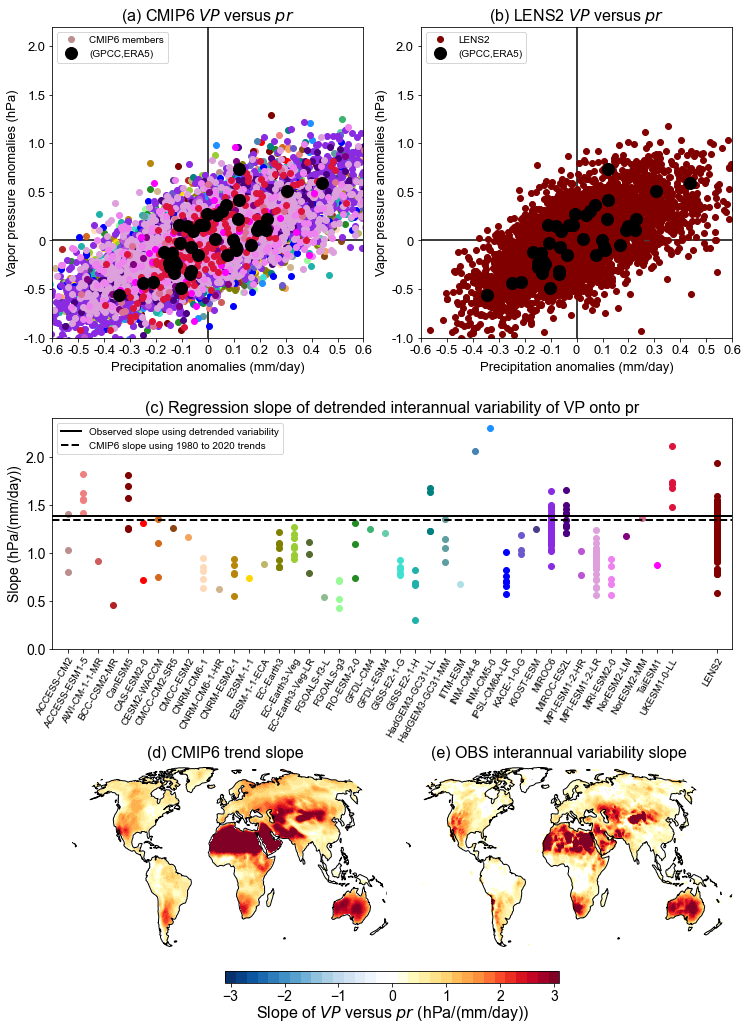

In [14]:
fig = plt.figure(figsize=(16,16))

ax = setup_vp_vs_pr(0.05,0.32,0.73,1,'(a) CMIP6 $VP$ versus $pr$')

for imodel in np.arange(0,cmip6_vp_am.model.size,1):
#for imodel in np.arange(0,1,1):
    datx = cmip6_pr_am.isel(model=imodel)
    daty = cmip6_vp_am.isel(model=imodel).vp
    datx = datx.sel(member=slice(1,nmems[imodel]))
    daty = daty.sel(member=slice(1,nmems[imodel]))
    datx_anoms = linfit.lineardetrend(datx, "year")
    daty_anoms = linfit.lineardetrend(daty, "year")
    datx_anoms = datx_anoms.stack(z=("year","member"))
    daty_anoms = daty_anoms.stack(z=("year","member"))
    ax.plot(datx_anoms, daty_anoms, "o", color=cmip6colors[imodel], label='CMIP6 members' if imodel == 0 else "")


ax.plot(gpcc_anoms, era5_anoms, "o", markersize=12, markerfacecolor='black', markeredgecolor='black', label='(GPCC,ERA5)')

ax.legend(loc='upper left')

#ax.plot([-0.6,0.6],[0,0],color='black')


ax = setup_vp_vs_pr(0.37,0.64,0.73,1,'(b) LENS2 $VP$ versus $pr$')
lens2_vp_anoms = linfit.lineardetrend(lens2_vp_am.vp, 'year')
lens2_pr_anoms = linfit.lineardetrend(lens2_pr_am, 'year')

lens2_vp_anoms_stack = lens2_vp_anoms.stack(z=("year","M"))
lens2_pr_anoms_stack = lens2_pr_anoms.stack(z=("year","M"))
ax.plot(lens2_pr_anoms_stack, lens2_vp_anoms_stack, "o", color='maroon', label='LENS2')


ax.plot(gpcc_anoms, era5_anoms, "o", markersize=12, markerfacecolor='black', markeredgecolor='black', label='(GPCC,ERA5)')

ax.legend(loc='upper left')




ax = fig.add_axes([0.05,0.46,0.59,0.2])
ax.set_ylim(0,2.4)
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels(['0.0','0.5','1.0','1.5','2.0'], fontsize=14)
ax.set_ylabel('Slope (hPa/(mm/day))', fontsize=14)
ax.set_title('(c) Regression slope of detrended interannual variability of VP onto pr', fontsize=16)


aobs, bobs = linfit.linfit_xy(gpcc_anoms, era5_anoms)

countx=1
for imodel in np.arange(0,cmip6_vp_am.model.size,1):
#for imodel in np.arange(0,1,1):
    datx = cmip6_pr_am.isel(model=imodel)
    daty = cmip6_vp_am.isel(model=imodel).vp
    datx = datx.sel(member=slice(1,nmems[imodel]))
    daty = daty.sel(member=slice(1,nmems[imodel]))
    datx_anoms = linfit.lineardetrend(datx, "year")
    daty_anoms = linfit.lineardetrend(daty, "year")
    
    
    bcoefs=[]
    for imem in np.arange(0,nmems[imodel],1):
        datxx = datx_anoms.isel(member=imem)
        datyy = daty_anoms.isel(member=imem)
        a, b = linfit.linfit_xy(datxx, datyy)
        bcoefs.append(b)
        
    ax.plot(np.zeros([nmems[imodel]]) + imodel+1, bcoefs, "o", color=cmip6colors[imodel])
    countx=countx+1
    
lens2_vp_anoms = linfit.lineardetrend(lens2_vp_am.vp, 'year')
lens2_pr_anoms = linfit.lineardetrend(lens2_pr_am, 'year')

bcoefs=[]
for imem in np.arange(0,lens2_vp_anoms.M.size,1):
    datxx = lens2_pr_anoms.isel(M=imem)
    datyy = lens2_vp_anoms.isel(M=imem)
    
    a, b = linfit.linfit_xy(datxx, datyy)
    bcoefs.append(b)
    
ax.plot(np.zeros([lens2_vp_anoms.M.size]) + countx + 2, bcoefs, "o", color='maroon')

ax.plot([0,countx+3],[bobs, bobs], color='black', linewidth=2, label='Observed slope using detrended variability')
ax.plot([0,countx+3],[btrend, btrend], color='black', linestyle='dashed', linewidth=2, label='CMIP6 slope using 1980 to 2020 trends')

ax.legend(loc='upper left')

ax.set_xlim(0,countx+3)

xcmip6 = np.arange(1,cmip6_pr_am.model.size+1,1)
xlens2 = [countx+2]
xvals = np.concatenate([xcmip6, xlens2])
xlabels = np.concatenate([cmip6_pr_am.model, ['LENS2']])

ax.set_xticks(xvals)
ax.set_xticklabels(labels=xlabels, rotation=60, ha='right', fontsize=10, rotation_mode='anchor')


ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, bglobal, bglobal.lon, bglobal.lat,0.2,-3,3,'(d) CMIP6 trend slope',
                                                            0.05,0.35,0.2,0.36, fontsize=16)

ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, bcoef, bcoef.lon, bcoef.lat, 0.2,-3,3,'(e) OBS interannual variability slope',
                                                            0.34,0.64,0.2,0.36, fontsize=16)


ax = cbars.plotcolorbar(fig, 0.2, -3, 3, 'Slope of $VP$ versus $pr$ (hPa/(mm/day))',
                        0.2,0.49,0.17,0.18)


fig.savefig(plotpath+'figS10.pdf', bbox_inches='tight', facecolor='white')